In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data["sentiment"].value_counts()
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [5]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=69)

In [8]:
train_data.shape

(40000, 2)

In [9]:
test_data.shape

(10000, 2)

In [10]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [11]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [12]:
X_test

array([[  39,  182,    5, ...,    1, 1094,   44],
       [   0,    0,    0, ...,    1,   86,  272],
       [   0,    0,    0, ..., 1968,  680,  118],
       ...,
       [   0, 3215,   15, ...,  277, 2613,   74],
       [   0,    0,    0, ..., 1786,   66,  794],
       [   0,    0,    0, ...,  147,  196,  680]], dtype=int32)

In [13]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [14]:
Y_test

20057    0
30147    0
17399    1
48629    0
25554    0
        ..
32535    0
10915    1
33636    1
452      0
12917    0
Name: sentiment, Length: 10000, dtype: int64

In [15]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"]) 

In [18]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.1)

Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 129s 225ms/step - accuracy: 0.7307 - loss: 0.5252 - val_accuracy: 0.7772 - val_loss: 0.4589
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 119s 211ms/step - accuracy: 0.8237 - loss: 0.4108 - val_accuracy: 0.8687 - val_loss: 0.3364
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 138s 245ms/step - accuracy: 0.8581 - loss: 0.3447 - val_accuracy: 0.8650 - val_loss: 0.3305
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 114s 203ms/step - accuracy: 0.8705 - loss: 0.3106 - val_accuracy: 0.8723 - val_loss: 0.3152
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 88s 156ms/step - accuracy: 0.8912 - loss: 0.2670 - val_accuracy: 0.8725 - val_loss: 0.3156


In [19]:
model.save("model.h5")

In [20]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [21]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8716 - loss: 0.3103


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


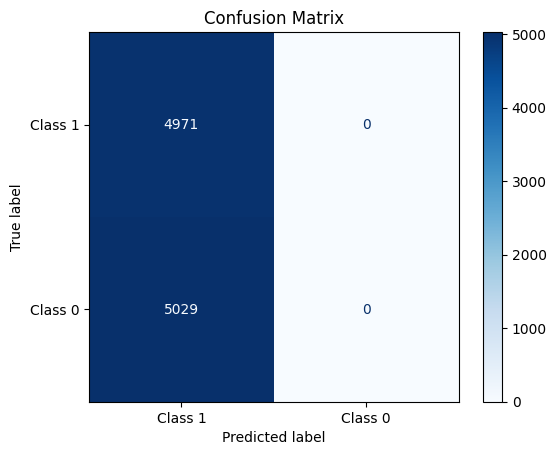

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
class_names = ['Class 1', 'Class 0'] 
predictions = model.predict(Y_test)  # Get probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
cm = confusion_matrix(Y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [22]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [23]:
predictive_system("not a good movie, it is bad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


'negative'

In [24]:
predictive_system("not good")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'negative'

In [28]:
predictive_system("actress did a nice job over theree")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'positive'

In [30]:
predictive_system("not bad, not good either")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'negative'